In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import json, os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
with open("../results/rate_constraints/adult-income/trials/results.json", 'r') as in_file:
    results = json.load(in_file)

In [13]:
def compute_overall_score(d):
    # compute mean of violations
    return np.mean(np.array(list(d.values())))

# Result 1: Overall constraint satisfaction score 

In [46]:
all_scores = []
constraint_set = ['0', '5', '10', '15', '22']
for num_constraints in constraint_set:
    trials = results[num_constraints]
    trial_scores = []
    for trial_num in trials.keys():
        score = compute_overall_score(trials[trial_num]['test_violation'])
        trial_scores.append(score)
    all_scores.append(trial_scores)

In [49]:
min_scores = []
mean_scores = []
max_scores = []
for i in range(len(all_scores)):
    if i == 0:
        continue
    min_scores.append(min(all_scores[i]))
    mean_scores.append(np.mean(all_scores[i]))
    max_scores.append(max(all_scores[i]))
mean_scores = np.array(mean_scores)
min_scores = np.array(min_scores)
max_scores = np.array(max_scores)

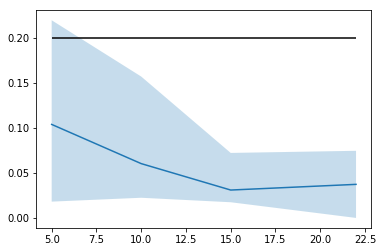

In [50]:
active_constraint_set = [5, 10, 15, 22]
plt.plot(active_constraint_set, mean_scores)
plt.fill_between(active_constraint_set, mean_scores - min_scores, mean_scores + max_scores, alpha=0.25)
plt.title("Test constraint set")
#plt.xlabel("Training Episode")
#plt.ylabel("Reward")
#plt.savefig("plots/rewards.png")
plt.hlines(y=0.2, xmin=5, xmax=22)
plt.show()